In [23]:
import sys

sys.path.append('/cluster/home/haroldh/spGDMM/3_src/1_data')

from fetch_sinmod_data import fetch_sinmod_data
from create_sample_locations import create_sample_locations

no_sites = 100
time_idx = 285
# Creating biomod training data
sampled_locations = create_sample_locations(no_sites, time_idx)

# Define constants
biomod_sinmod_path = "/cluster/home/haroldh/spGDMM/1_data/1_raw/biostates_surface_normalised.nc"
biomod_target_variables = [
    'diatoms', 'flagellates', 'ciliates', 'HNANO', 'bacteria',
    'calanus_finmarchicus', 'calanus_glacialis', 'detritus_slow', 'detritus_fast'
]

biomod = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables)

# Define constants
# Here the SINMOD_features dataset must have a 'stat' dimension. ALl features in stat dimension will be used.
path = '/cluster/home/haroldh/spGDMM/1_data/4_interim/SINMOD_features.nc'
target_variables = [
    'temperature', 'salinity'
]

midnor = fetch_sinmod_data(path, sampled_locations, target_variables, target=False)

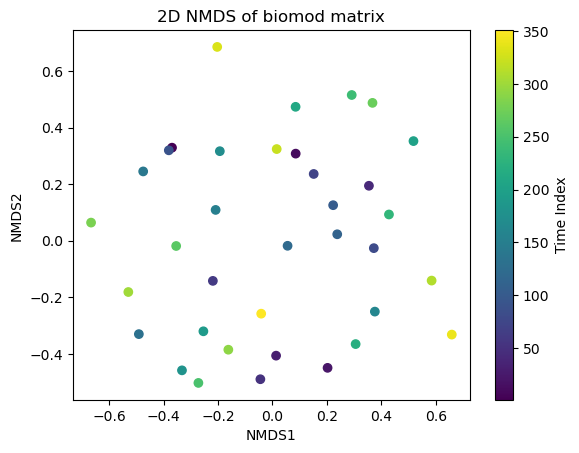

Stress: 0.2877658443097388


In [20]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the biomod matrix from column 4 onward
biomod_matrix = final_results.iloc[:, 3:].values

# Run NMDS
nmds = MDS(n_components=2, metric=False, max_iter=500, random_state=42, dissimilarity='precomputed')
# Compute the Bray-Curtis dissimilarity matrix
dissimilarity_matrix = squareform(pdist(biomod_matrix, metric='braycurtis'))

# Fit NMDS with the precomputed dissimilarity matrix
nmds_fit = nmds.fit_transform(dissimilarity_matrix)

# Plot the NMDS result, color by time_index
plt.figure()
sc = plt.scatter(nmds_fit[:, 0], nmds_fit[:, 1], c=final_results['time_idx'], cmap='viridis')
plt.colorbar(sc, label='Time Index')
plt.title('2D NMDS of biomod matrix')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.show()

print(f"Stress: {nmds.stress_}")


In [24]:
import pandas as pd
results = []
for time_index in range(1,360,10):

    sampled_locations = create_sample_locations(1, time_index)
    result = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables)

    results.append(result)

final_results = pd.concat(results)

In [25]:
final_results.head(11)

,x,y,time_idx,diatoms,flagellates,ciliates,HNANO,bacteria,calanus_finmarchicus,calanus_glacialis,detritus_slow,detritus_fast
0,110400.0,284800.0,1,0.072923,0.054973,0.595799,0.145360,0.079122,0.006032,0.0,0.045792,0.0
0,110400.0,284800.0,11,0.090856,0.068625,0.545694,0.160995,0.095984,0.001126,0.0,0.036721,0.0
0,110400.0,284800.0,21,0.137273,0.102089,0.362348,0.208382,0.134944,0.019618,0.0,0.035347,0.0
0,110400.0,284800.0,31,0.141651,0.105345,0.384690,0.187099,0.142486,0.008887,0.0,0.029843,0.0
0,110400.0,284800.0,41,0.132408,0.103912,0.345595,0.154476,0.146833,0.077685,0.0,0.039091,0.0
0,110400.0,284800.0,51,0.105101,0.085142,0.173394,0.117592,0.122378,0.348657,0.0,0.047737,0.0
0,110400.0,284800.0,61,0.083266,0.066522,0.607212,0.065721,0.109385,0.018319,0.0,0.049576,0.0
0,110400.0,284800.0,71,0.138877,0.083201,0.348933,0.091430,0.198797,0.006928,0.0,0.131833,0.0
0,110400.0,284800.0,81,0.107126,0.081160,0.443016,0.069554,0.191027,0.001618,0.0,0.106499,0.0
0,110400.0,284800.0,91,0.125705,0.079433,0.368012,0.054485,0.235330,0.000140,0.0,0.136895,0.0


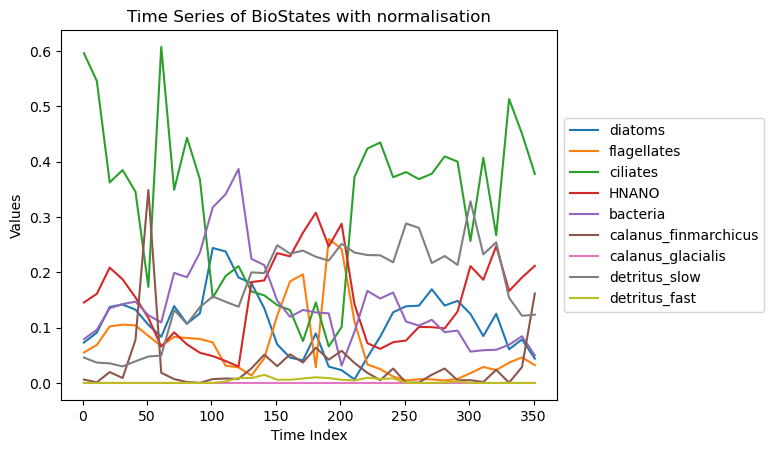

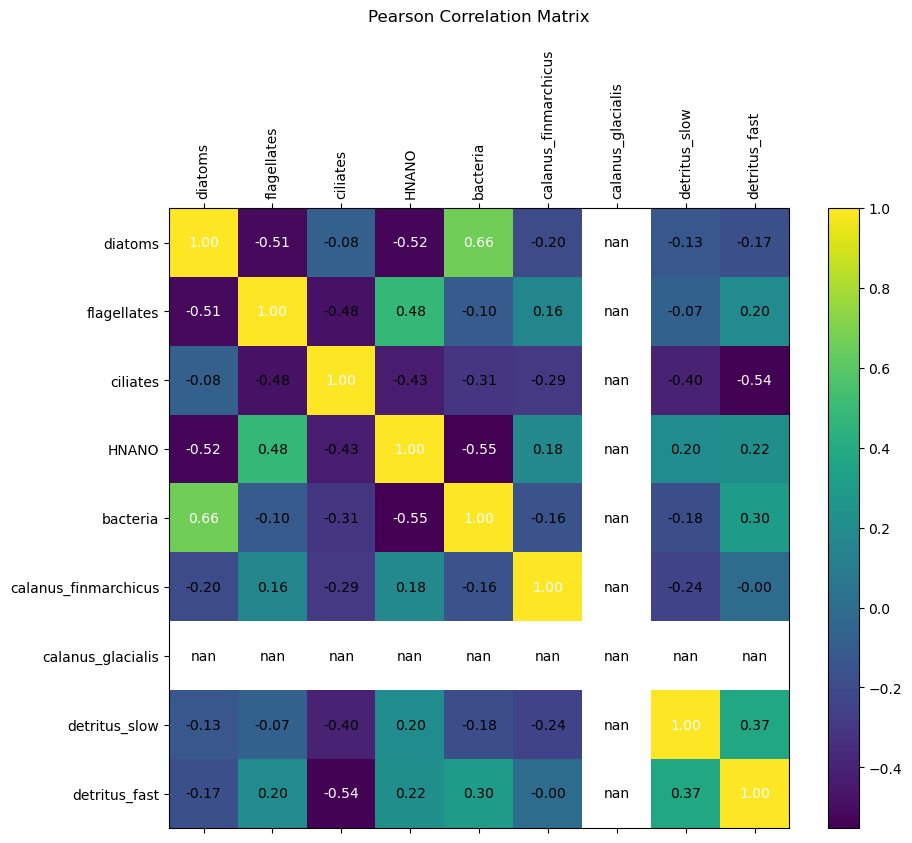

In [30]:
import numpy as np

# Plot each column as a time series on the same graph
plt.figure()
for column in final_results.columns[3:]:
    plt.plot(final_results['time_idx'], final_results[column], label=column)
plt.title('Time Series of BioStates with normalisation')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Compute the Pearson correlation matrix
correlation_matrix = final_results.iloc[:, 3:].corr()
# Plot the correlation matrix with numbers
plt.figure(figsize=(10, 8))
cax = plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(cax)

# Add numbers to the correlation matrix
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')

plt.title('Pearson Correlation Matrix', pad=20)
plt.show()


In [11]:
biomod.to_csv('/cluster/home/haroldh/spGDMM/1_data/2_processed/training/biomod.csv', index=False)

In [8]:
midnor.to_csv('/cluster/home/haroldh/spGDMM/1_data/2_processed/training/midnor.csv', index=False)